In [19]:
import numpy as np
import matplotlib.pyplot as plt

## Necissary Calibration

### Part 1: Magnetic Field

In [27]:
# B(z) measurement inside the coil at I = 1.00 A

B_z = np.array([
# z in cm, B in mT
    [0.0, 3.5],
    [0.5, 5.2],
    [1.0, 6.4],
    [1.5, 7.4],
    [2.0, 8.2],
    [2.5, 8.8],
    [3.0, 9.1],
    [3.5, 9.3],
    [4.0, 9.2],
    [4.5, 8.9],
    [5.0, 8.4],
    [5.5, 7.6],
    [6.0, 6.6],
    [6.5, 5.3],
    [7.0, 4.2]
]).T

B_err = 0.1 #mT


B_I = np.array([ # for z = 3.5 cm
#  I in A, B in mT
    [0.00,-0.5],
    [0.20, 1.3],
    [0.40, 3.3],
    [0.60, 5.3],
    [0.80, 7.3],
    [1.00, 9.3],
    [1.20, 11.3],
    [1.40, 13.3],
    [1.60, 15.2]
]).T

#### Task 2: B(z)

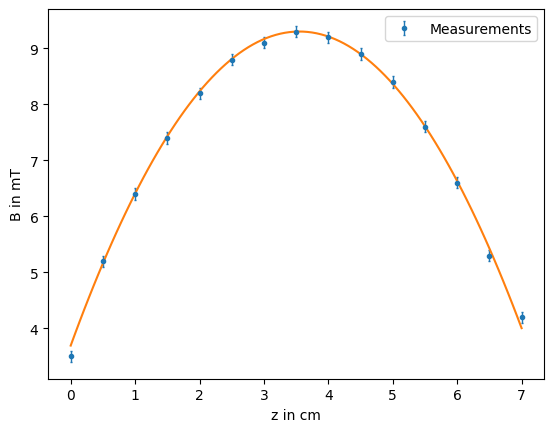

In [21]:
plt.errorbar(B_z[0],B_z[1],yerr=B_err, fmt='.', capsize=1, elinewidth=1, label='Measurements')# xerr=0.01, line_style='dashed' )
plt.ylabel('B in mT')
plt.xlabel('z in cm')
plt.legend()

# Manual fit:
x_fit = np.linspace(0,7,100)
def y_fit(x):
    return -0.445*(x-3.55)**2+9.3
plt.plot(x_fit,y_fit(x_fit))

In [22]:
import scipy.integrate as integrate

B_avg_integ = integrate.quad(lambda x: y_fit(x),0,7)
B_avg_integ =np.round(np.array(B_avg_integ)[0]/7, decimals=2)
print('B_avg_integ = ',B_avg_integ ,'+-',0.3,'mT', )

B_avg_integ =  7.48 +- 0.3 mT


In [23]:
B_avg_sum = 0.5*np.sum(B_z[1])/7
print('B_avg_sum = ',np.round(np.array(B_avg_sum), decimals=2),'+-',0.3,'mT', )

B_avg_sum =  7.72 +- 0.3 mT


In [24]:
# B_Ampl

B_Ampl_integ = B_avg_integ*np.sqrt(2)
B_Ampl_sum = B_avg_sum*np.sqrt(2)

print('B_Ampl_integ = ',np.round(np.array(B_Ampl_integ), decimals=2),'+-',0.42,'mT', )
print('B_Ampl_sum = ',np.round(np.array(B_Ampl_sum), decimals=2),'+-',0.42,'mT', )


B_Ampl_integ =  10.58 +- 0.42 mT
B_Ampl_sum =  10.92 +- 0.42 mT


#### Task 3: B(I)

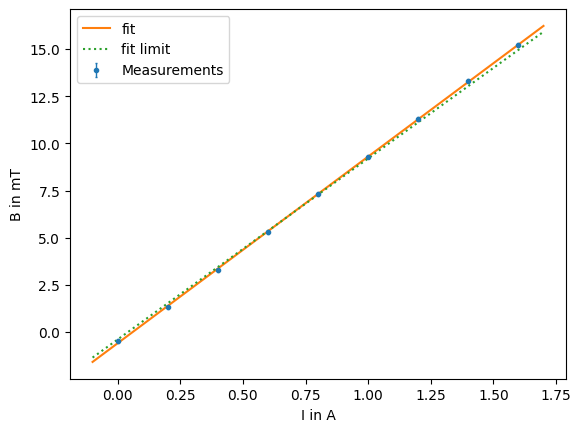

In [53]:
# Calibration curve B = f(I)

plt.errorbar(B_I[0],B_I[1],yerr=B_err, fmt='.', capsize=1, elinewidth=1, label='Measurements')# xerr=0.01, line_style='dashed' )
plt.ylabel('B in mT')
plt.xlabel('I in A')

# Manual fit:
x_fit = np.linspace(-0.1,1.7,100)
def y_fit(x):
    return -0.6 + x*9.9
plt.plot(x_fit,y_fit(x_fit),'-', label='fit')

def y_fit_grenz(x):
    return -0.4 + x*9.6
plt.plot(x_fit,y_fit_grenz(x_fit),':', label='fit limit')

plt.legend()

$\rightarrow B(I) = [-0.6 \pm 0.2] + I \cdot [9.9 \pm 0.3] \: mT$

Amplitude of B with AC ($\times \sqrt{2}$):


$\rightarrow B_{AC Ampl}(I) = [-0.8 \pm 0.3] + I \cdot [14.0 \pm 0.5] \: mT$


### Part 2:

#### Task 5: Malus-slope without Glass

In [57]:
# Mesurement Data:

# with I_B = 0.012 V

I_phi = np.array([
  # phi in °, I in A
  [ 90, 5.16],
  [ 80, 5.01],
  [ 70, 4.57],
  [ 60, 3.89],
  [ 50, 3.04],
  [ 40, 2.15],
  [ 30, 1.315],
  [ 20, 0.628],
  [ 10, 0.259],
  [  0, 0.20],
  [-10, 0.171],
  [-20, 0.593],
  [-30, 1.256],
  [-40, 2.08],
  [-50, 2.99],
  [-60, 3.81],
  [-70, 4.53],
  [-80, 5.00],
  [-90, 5.18]

]).T

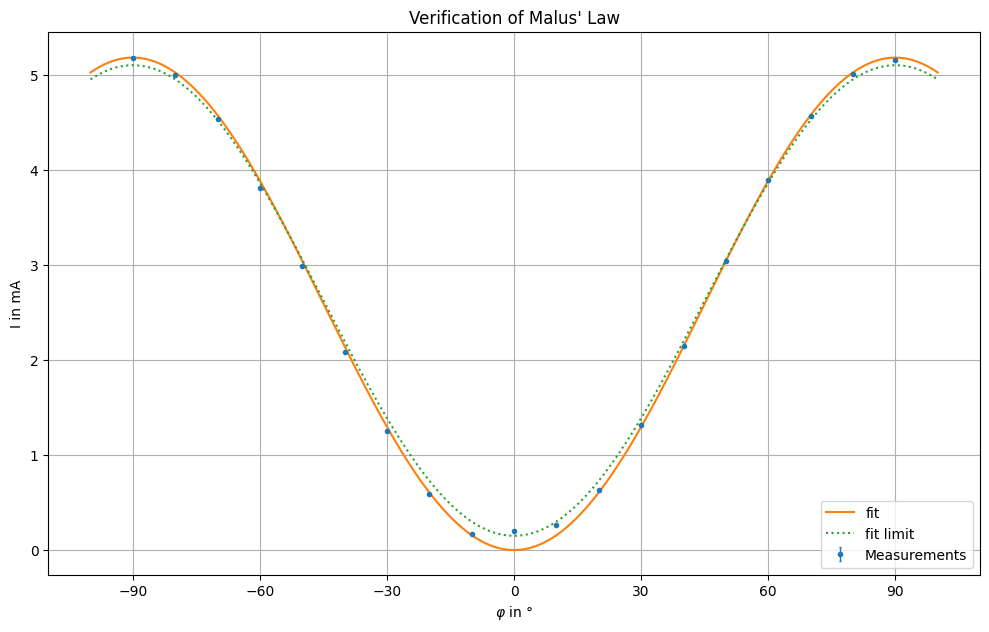

In [ ]:

plt.figure(figsize=(10., 6.2))
plt.errorbar(I_phi[0],I_phi[1],yerr=0.01, fmt='.', capsize=1, elinewidth=1, label='Measurements')# xerr=0.01, line_style='dashed' )
plt.ylabel(r'I in mA')
plt.xlabel(r"$\varphi$ in °")

# Manual fit cos(phi):
x_fit = np.linspace(-100,100,1000)
def y_fit(x):
    x = x*2*np.pi/360
    return 5.18*np.cos(x+np.pi/2)**2
plt.plot(x_fit,y_fit(x_fit),'-', label='Fit')

def y_fit_grenz(x):
    x = x*2*np.pi/360
    return 4.95*np.cos(x+np.pi/2)**2+0.15
plt.plot(x_fit,y_fit_grenz(x_fit),':', label='Fit limit')

plt.xticks(np.linspace(-90,90,7))
plt.tight_layout()
plt.grid(True)
plt.legend(loc=4)
plt.title('Verification of Malus\' Law')
plt.show()

I_par = np.max(y_fit(x_fit))
I_par_err = np.abs(np.max(y_fit_grenz(x_fit)) - np.max(y_fit(x_fit)))

I_par = np.min(y_fit(x_fit))
I_par_err = np.abs(np.min(y_fit_grenz(x_fit)) - np.min(y_fit(x_fit)))

#### Task 6: Malus-slope with Glass

#### Task 8: Modulation of Magnetic Field

## Determination of Verdet-constant:

## Code snippets:

In [ ]:
# Tangential fit at 45°
phi_deg = x_fit
I0_fit = 5.18
I0_fit_grenz = 4.95

phi0_deg = -45.0
I_wp = I0_fit * np.cos(np.deg2rad(phi0_deg))**2
I_wp_grenz = I0_fit_grenz * np.cos(np.deg2rad(phi0_deg))**2 +0.15

# Derivative: d/dphi [I0 cos^2(phi)] = -I0 sin(2phi), with phi in radians
slope_per_rad = I0_fit * np.sin(2 * np.deg2rad(phi0_deg))  # = -I0 at 45°
slope_per_rad_grenz = I0_fit_grenz * np.sin(2 * np.deg2rad(phi0_deg))  # = -I0 at -45°

# Tangent line around 45°
phi_tan_deg = np.linspace(-80, -15, 250)
I_tan = I_wp + slope_per_rad * np.deg2rad(phi_tan_deg - phi0_deg)
I_tan_grenz = I_wp_grenz + slope_per_rad_grenz * np.deg2rad(phi_tan_deg - phi0_deg)

plt.plot(phi_tan_deg, I_tan, "--", label=r"Tangent at $\varphi=45^\circ$", color='darkorange')

plt.plot(phi_tan_deg, I_tan_grenz, "--", label=r"Tangent_lim at $\varphi=45^\circ$", color='green')


# Mark and annotate working point
plt.scatter([phi0_deg], [I_wp], zorder=5, color='lightblue')
plt.annotate(
    r"$\varphi=45^\circ$" "\n" r"max slope",
    xy=(phi0_deg, I_wp),
    xytext=(-28, 0.82 * I0_fit),
    arrowprops=dict(arrowstyle="->"),
    fontsize=10
)


print('Slope_max =', np.round(slope_per_rad,2), '+-', np.round(np.abs(slope_per_rad-slope_per_rad_grenz),2))